# ChessVision Performance Report

This notebook can be used to generate a full performance report of the ChessVision system.

### Imports

In [1]:
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import chessvision as cv
from test import run_tests, get_test_generator
import cv_globals
import cv2
import numpy as np
from model.u_net import load_extractor
from model.square_classifier import load_classifier

Using Theano backend.


### Parameters

These variables will be filled in by papermill. 
(Default to using current best models)

In [2]:
classifier_weights = cv_globals.square_weights
extractor_weights  = cv_globals.board_weights
threshold          = 80

In [3]:
# Parameters
threshold = 80
extractor_weights = "/Users/gudbrand/Programming/Chess/ChessVision/weights/best_extractor.hdf5"
classifier_weights = "/Users/gudbrand/Programming/Chess/ChessVision/weights/best_classifier.hdf5"


### Load models and test data generator

In [4]:
data_generator = get_test_generator()
extractor      = load_extractor(weights=extractor_weights)
classifier     = load_classifier(weights=classifier_weights)

Loading board extraction model..


Loading board extraction model.. DONE
Loading square model..


Loading square model.. DONE


In [5]:
results = run_tests(data_generator, extractor, classifier, threshold)

Processing image f29c1937-8279-45a5-a74a-0c6b1aa3ffbe.JPG


Processing image 8991e2f3-56cc-4ae3-a57d-69f8c9586efe.JPG


Processing image 325732c8-7fb2-47a3-a579-e335c304d0af.JPG


Processing image 6404e621-cc56-4db2-8970-76ea123e8a71.JPG


Processing image f41748b5-9f3b-42d3-a820-406359bde123.JPG


Processing image 15eeff0a-a72a-42c6-b7da-fea889968554.JPG


Processing image 76be4f7f-c712-47da-adb5-ec65d002b162.JPG


White pawn on 1st rank!
White pawn on 1st rank!
Processing image d966d405-61d5-492d-999d-096348ffd818.JPG


Processing image 832d3ee5-a702-4003-aac6-e801122f0d35.JPG


Processing image b7ab6da8-face-4c24-84ab-02ae722eac70.JPG


Processing image dace9b35-3ad9-41dd-b60b-9d6a854619eb.JPG


Processing image 18bc9861-4199-4ea6-9e32-c15c8d05d349.JPG


Processing image b5c5391e-bd93-46a5-b859-c61b9492b720.JPG


Classified 13 raw images


### Get results

In [6]:
board_imgs = results["board_imgs"]
imgs = results["raw_imgs"]
predictions = results["predictions"]
boards = results["chessboards"]
squares = results["squares"]
acc = results["acc"]
avg_time = results["avg_time"]
squares = results["squares"]
N = len(results["raw_imgs"])

In [7]:
def entropy(dist):
    return sum([-p * np.log(p) for p in dist if p != 0])

def avg_entropy(predictions):
    return sum([entropy(p) for p in predictions]) / len(predictions)

In [8]:
print("Test suite accuracy: {:.1f}%".format(acc*100))
print("Average time per raw classification: {:.1f}s".format(avg_time))

clf_entropy = sum([avg_entropy(p) for p in predictions]) / len(predictions)

print("Average entropy classifier predictions: {:.2g}".format(clf_entropy))

Test suite accuracy: 92.8%
Average time per raw classification: 3.2s
Average entropy classifier predictions: 9.9e-05


### Plot results

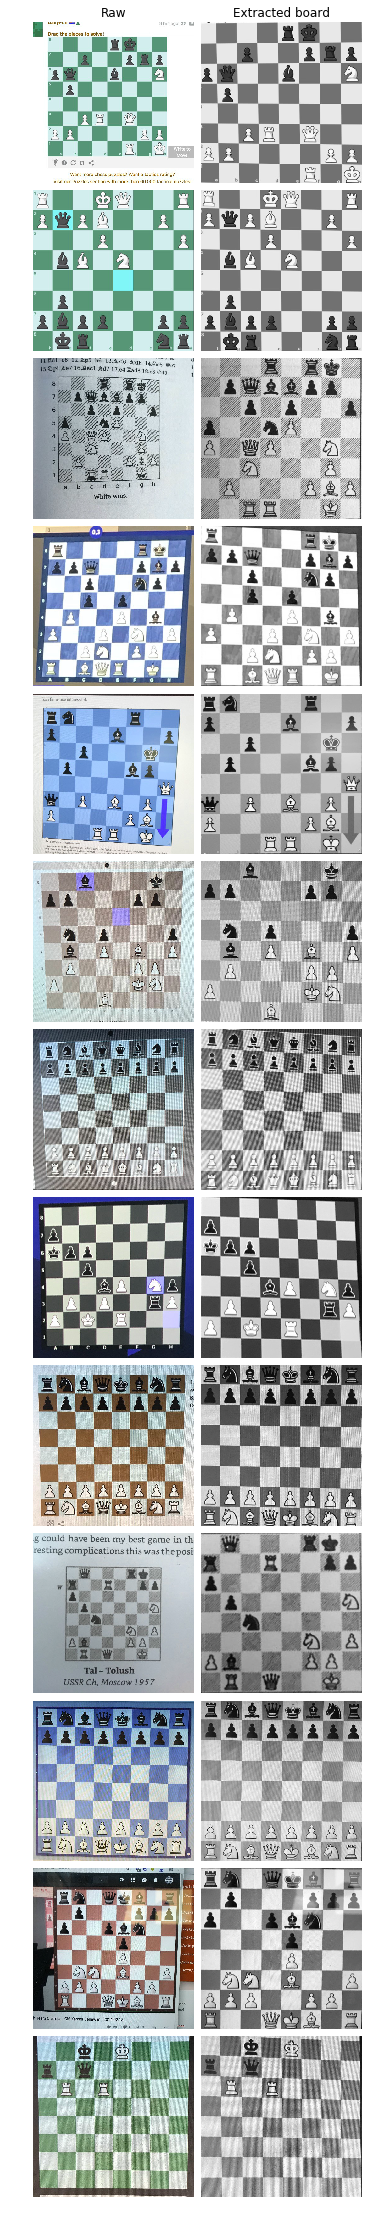

In [9]:
rows = N
cols = 2

fig = plt.figure(1, figsize=(12, 40)) #width, height in inches.

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 share_all=True,
                 label_mode=None
                 )

for i in range(rows):
    raw = imgs[i]
    board = board_imgs[i]
    
    ax1 = grid[cols*i]
    ax1.imshow(raw)
    ax1.axis("off")
    
    ax2 = grid[cols*i+1]
    ax2.imshow(board, cmap="gray")
    ax2.axis("off")
    
    if i == 0:
        ax1.set_title("Raw")
        ax2.set_title("Extracted board")

#plt.savefig("../../img/training_extraction.png", bbox_inches="tight")
plt.show()


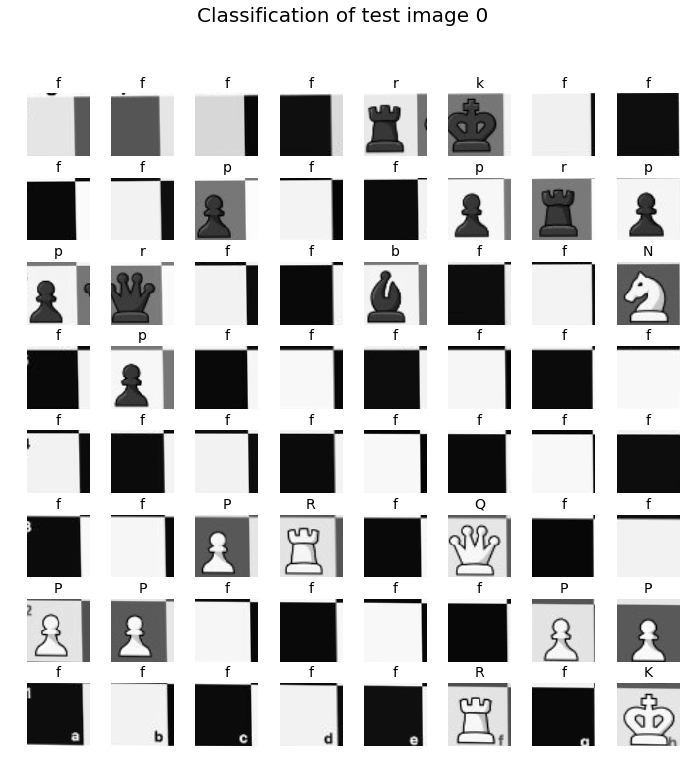

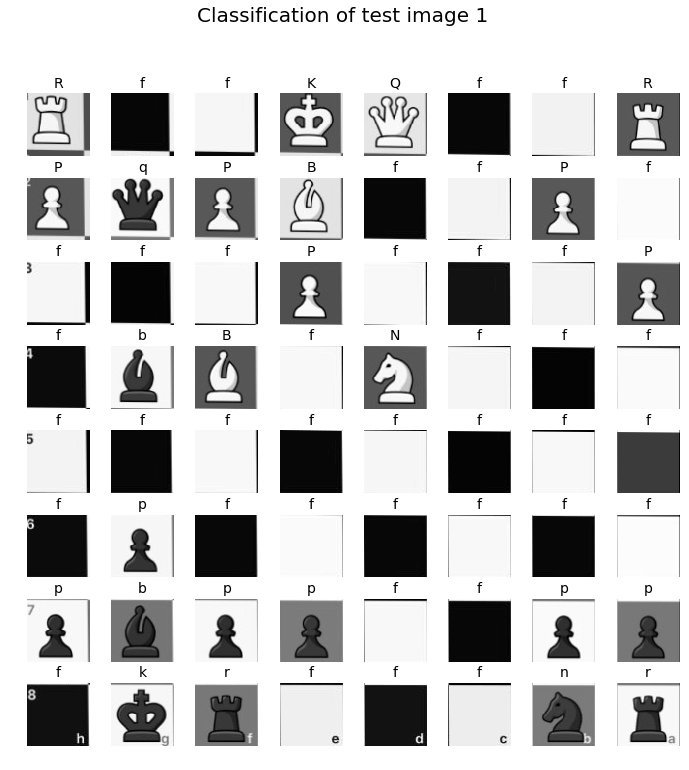

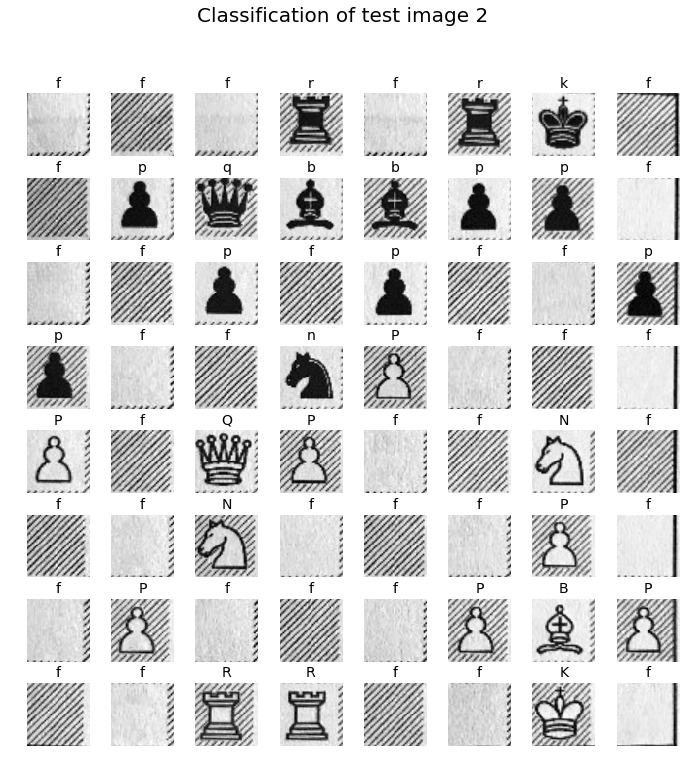

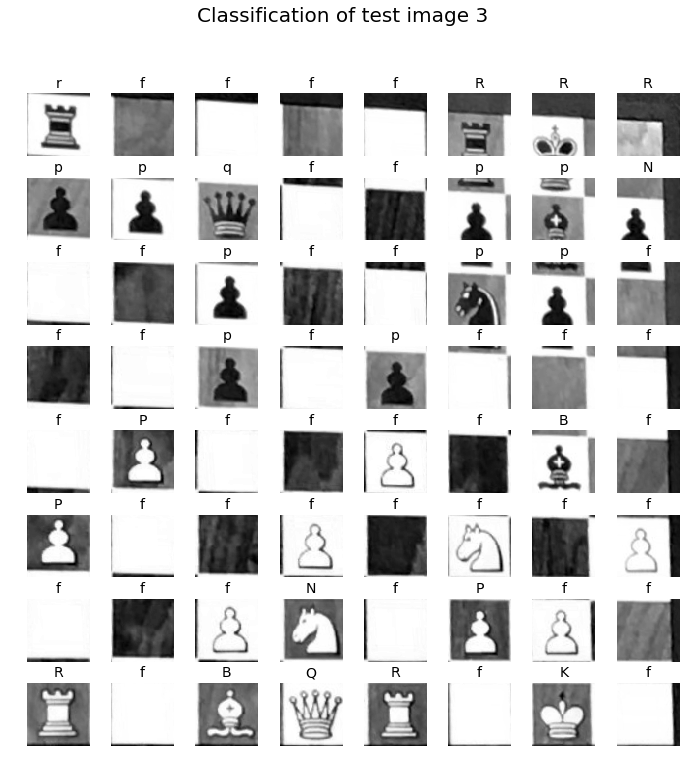

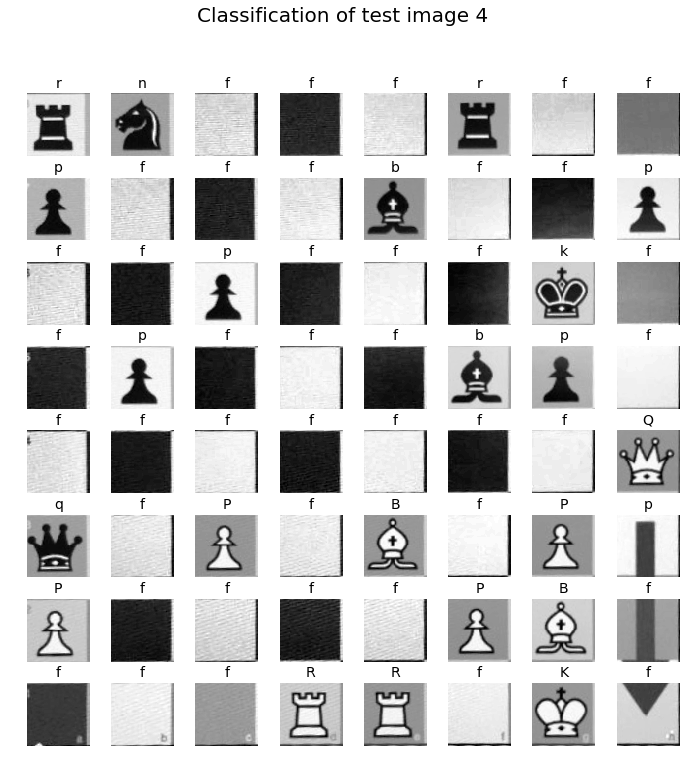

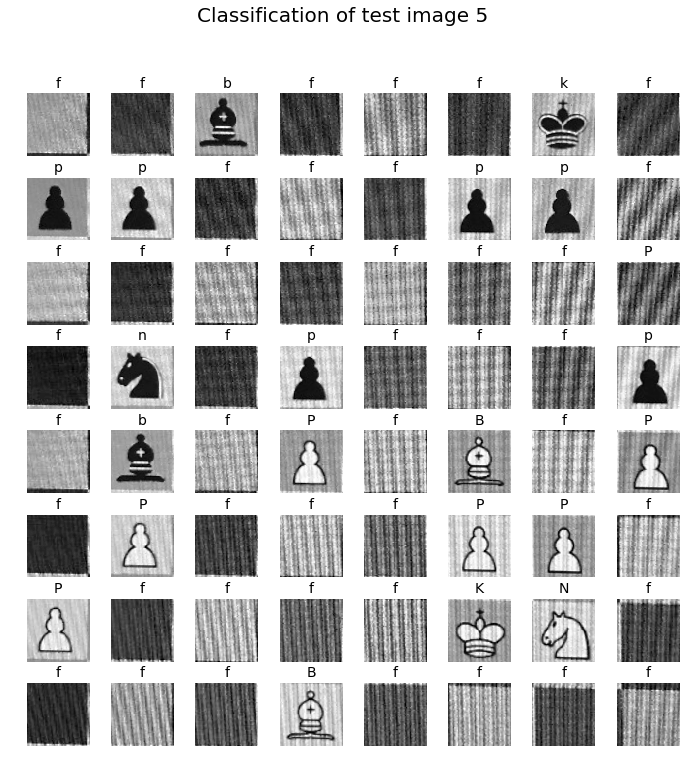

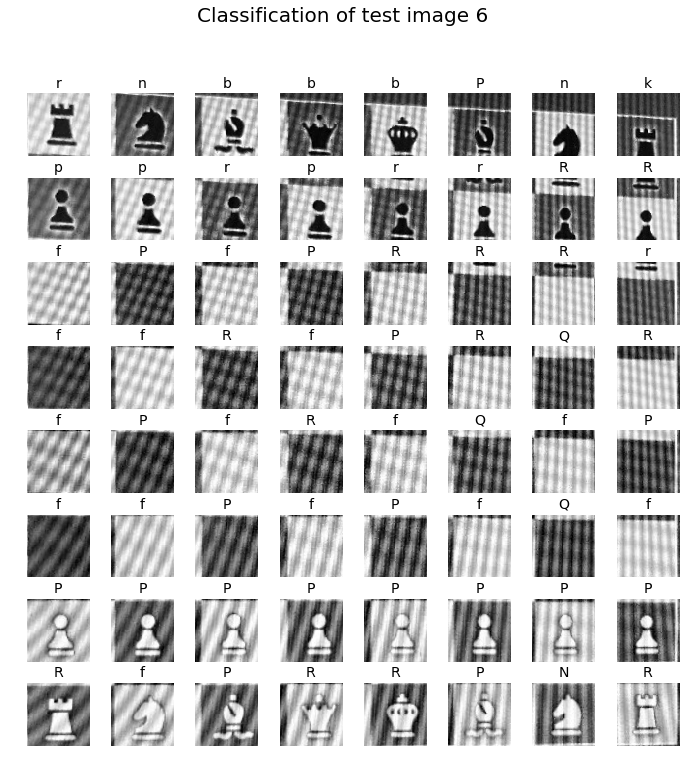

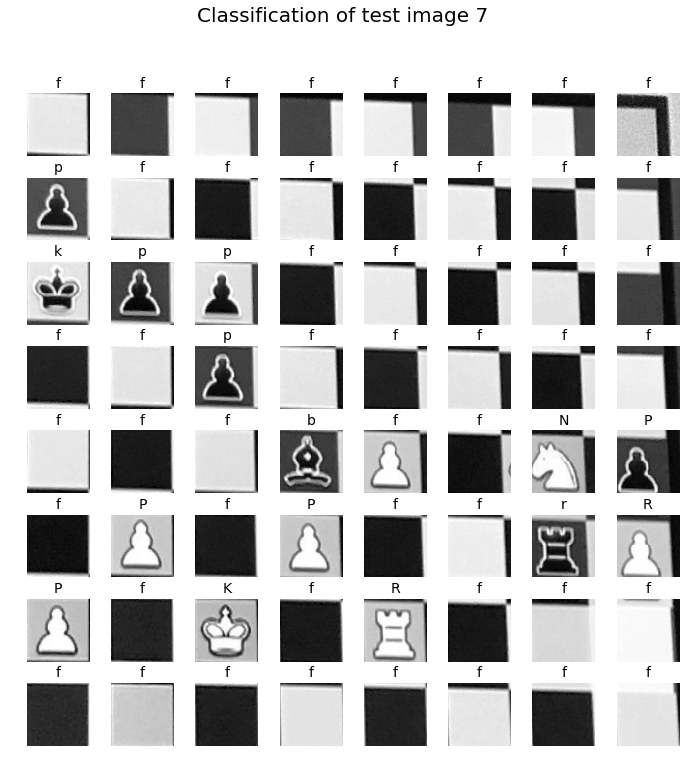

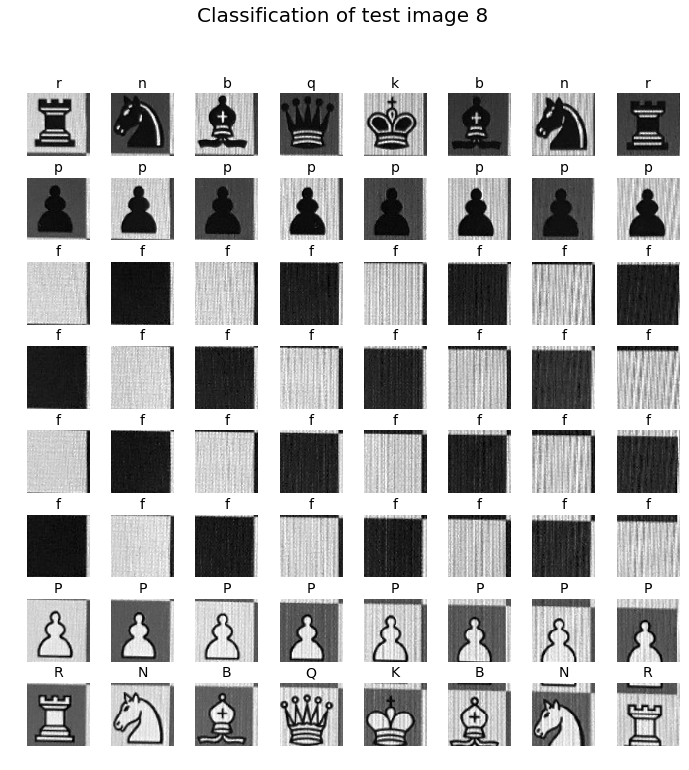

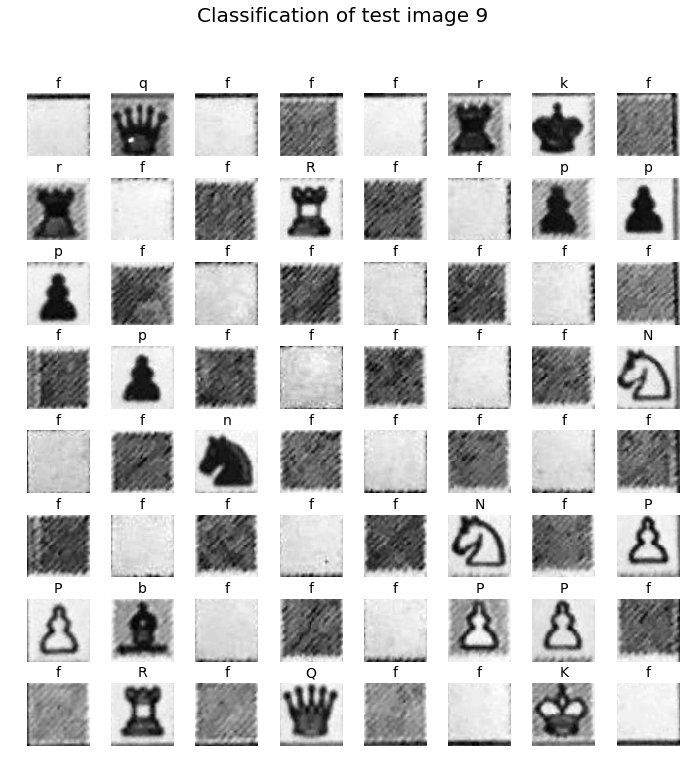

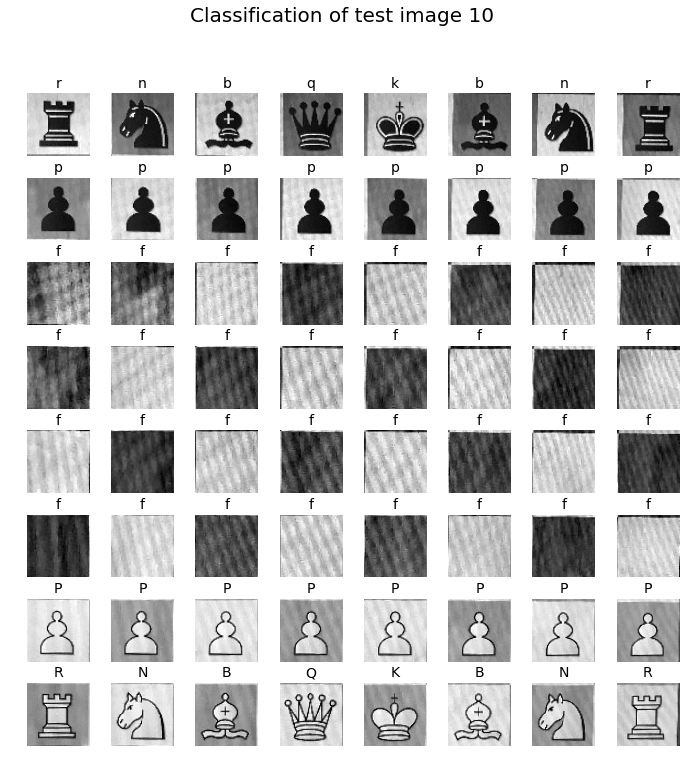

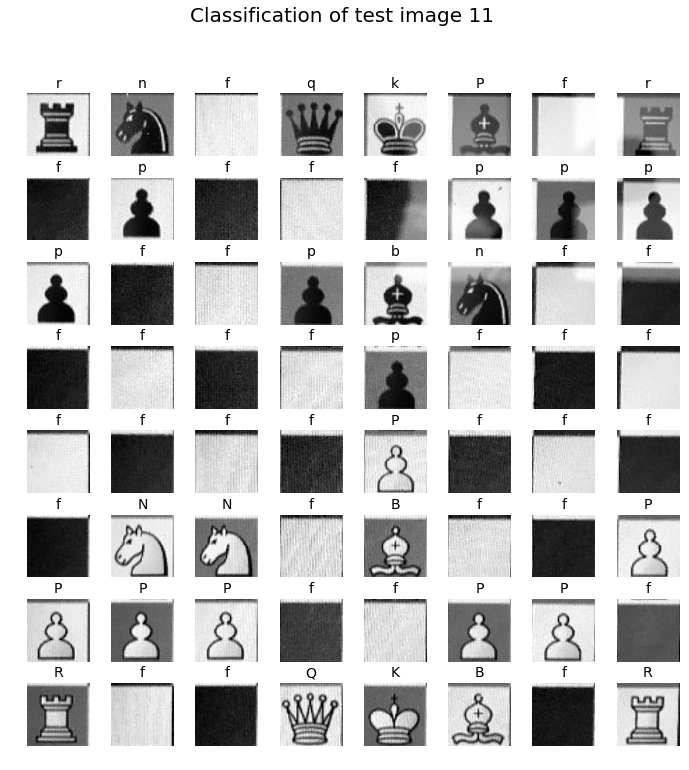

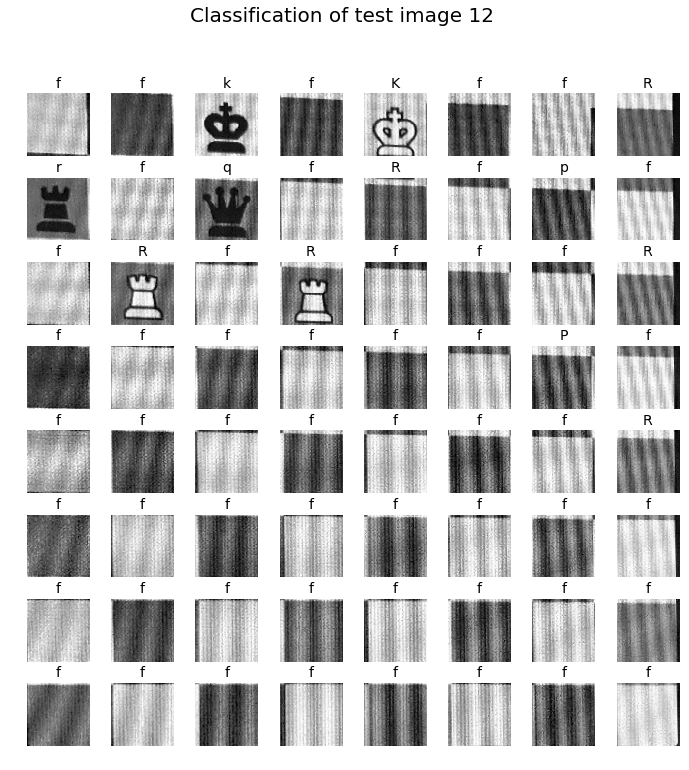

In [10]:

label_names  = ['B', 'K', 'N', 'P', 'Q', 'R', 'b', 'k', 'n', 'p', 'q', 'r', 'f']

for k in range(N):
    prediction = np.argmax(predictions[k], axis=1)
    pred_labels = [label_names[p] for p in prediction]
    square_grid = squares[k]
    # Plot
    rows, cols = 8, 8
    fig = plt.figure(figsize=(12, 12))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     label_mode=None
                     )

    for i in range(cols):
        for j in range(rows):
            ind = cols*i+j
            im = square_grid[ind]
            label = pred_labels[ind]
            grid[ind].imshow(im.reshape(64, 64), cmap="gray")
            grid[ind].set_title(label, size=14, fontweight=3)
            grid[ind].axis("off")

    plt.suptitle("Classification of test image {}".format(k), size=20, fontweight=5)